In [ ]:
import pandas as pd 
import numpy as np

In [5]:
df = pd.read_csv("../data/Telco_customer_churn.csv")

In [6]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [9]:
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [10]:
df['Churn Label'].value_counts()

Churn Label
No     5174
Yes    1869
Name: count, dtype: int64

In [11]:
df['Churn Label'].value_counts()

Churn Label
No     5174
Yes    1869
Name: count, dtype: int64

In [15]:
df['Churn Label'].value_counts(normalize=True)* 100

Churn Label
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

In [16]:
df.groupby('Contract')['Churn Label'].value_counts()

Contract        Churn Label
Month-to-month  No             2220
                Yes            1655
One year        No             1307
                Yes             166
Two year        No             1647
                Yes              48
Name: count, dtype: int64

In [17]:
df.groupby('Contract')['Churn Label'].value_counts(normalize=True)* 100

Contract        Churn Label
Month-to-month  No             57.290323
                Yes            42.709677
One year        No             88.730482
                Yes            11.269518
Two year        No             97.168142
                Yes             2.831858
Name: proportion, dtype: float64

In [18]:
df.groupby('Tenure Months')['Churn Label'].value_counts(normalize=True)* 100

Tenure Months  Churn Label
0              No             100.000000
1              Yes             61.990212
               No              38.009788
2              Yes             51.680672
               No              48.319328
                                 ...    
70             Yes              9.243697
71             No              96.470588
               Yes              3.529412
72             No              98.342541
               Yes              1.657459
Name: proportion, Length: 145, dtype: float64

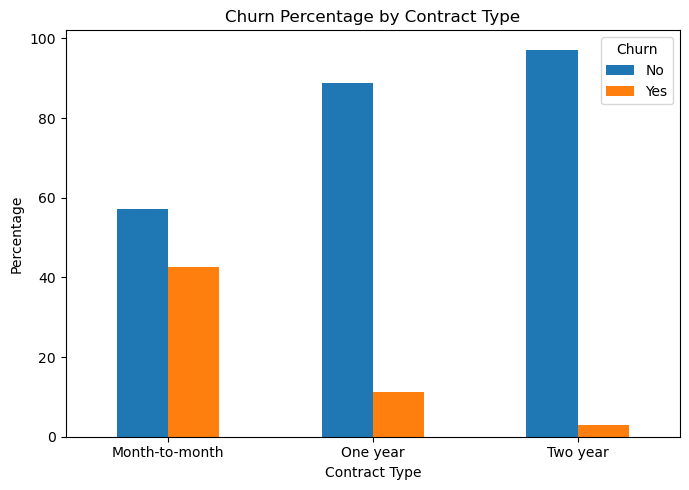

In [19]:
import matplotlib.pyplot as plt

# Prepare data
contract_churn = (
    df.groupby('Contract')['Churn Label']
    .value_counts(normalize=True)
    .unstack() * 100
)

# Plot
contract_churn.plot(kind='bar', figsize=(7,5))
plt.title('Churn Percentage by Contract Type')
plt.ylabel('Percentage')
plt.xlabel('Contract Type')
plt.xticks(rotation=0)
plt.legend(title='Churn')
plt.tight_layout()
plt.show()


In [20]:
df.groupby('Payment Method')['Churn Label'].value_counts(normalize=True)* 100

Payment Method             Churn Label
Bank transfer (automatic)  No             83.290155
                           Yes            16.709845
Credit card (automatic)    No             84.756899
                           Yes            15.243101
Electronic check           No             54.714588
                           Yes            45.285412
Mailed check               No             80.893300
                           Yes            19.106700
Name: proportion, dtype: float64

In [21]:
plt.savefig("../outputs/tenure_vs_churn.png", bbox_inches="tight")
plt.show()

<Figure size 640x480 with 0 Axes>

In [22]:
plt.savefig("../outputs/payment_method_vs_churn.png", bbox_inches="tight")
plt.show()

<Figure size 640x480 with 0 Axes>